### Optimization with PyTorch
This notebook explains gradient descent and then demonstrates how PyTorch can be used for this purpose.

#### Optimization by gradient descent

Consider the function $f(x) = x_0^2 (2+\cos 2x_1) + (x_1-1)^2$ with minimum at $\mathbf{x}=(0,1)^T$, defined below as numpy function:

In [1]:
import numpy as np

def f(x):
    return x[0]**2 * ( 2 + np.cos( x[1]*2 ) )  + (x[1]-1)**2

Here is a heatmap of the function:

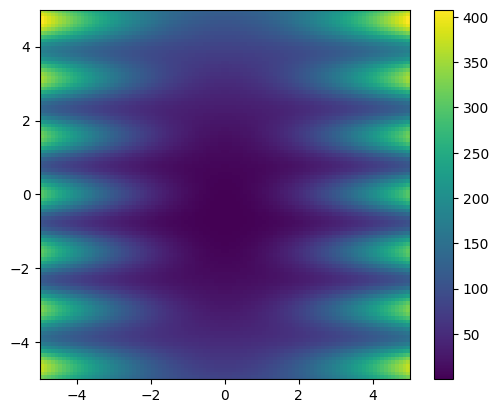

In [2]:
import matplotlib.pyplot as plt

ym = np.array(
  [ [ f( [x1,x2] ) 
     for x1 in np.linspace(-10,10,100) ] 
        for x2 in np.linspace(-10,10,100) ] )

plt.imshow( ym, extent=[-5,5,-5,5] )
plt.colorbar()

By manual calculation, we find the function's gradient: $\nabla f(x) = \left(2x_0(2+\cos 2x_1),\,-2x_0^2\sin x_1+2(x_1-1)\right)^T$:

In [3]:
def df(x):
    return np.array([
        2*x[0]*(2+np.cos(2*x[1])),
        -2*x[0]**2*np.sin(2*x[1]) + 2*(x[1]-1) ])

A quick point check that the gradient is correct:

In [4]:
df([4,3]), (f([4.0001,3])-f([4,3]))/.0001, (f([4,3.0001])-f([4,3]))/.0001, 

(array([23.68136229, 12.94129594]), 23.681658310223952, 12.938323337863267)

Simple gradient descent: Start at some random initial point, keep subtracting the gradient, multiplied with a "learning rate", until the objective function does not drop further:

In [5]:
x = np.array( [ 4., 3. ] )
print( x, f(x) )
for i in range(40): 
    x -= .1 * df(x)
    print( x, f(x) )

[4. 3.] 51.362724586405854
[1.63186377 1.70587041] 3.257815016014934
[1.29365392 1.42256021] 1.925109038527359
[1.02363551 1.43583253] 1.2757213430511452
[0.81149528 1.40454922] 0.8582512839205794
[0.64030729 1.36662808] 0.5781181569661341
[0.50171696 1.32586276] 0.3875098709767527
[0.38957272 1.28437749] 0.2568645759492188
[0.29922039 1.2439541 ] 0.16750376189583255
[0.22703937 1.20605254] 0.10712237875736201
[0.17007592 1.1717131 ] 0.06714620261260032
[0.12578886 1.14151311] 0.04133104265266899
[0.0919145  1.11560577] 0.025078694395013798
[0.0664256 1.093819 ] 0.015074342798621406
[0.04754029 1.07577504] 0.009022013123749619
[0.03374081 1.06099794] 0.005401420251213278
[0.02377856 1.04899232] 0.003246621548404917
[0.01665976 1.03929158] 0.001963967984254689
[0.011616   1.03148177] 0.0011972049096268637
[0.0080674 1.0252092] 0.0007356375926386619
[0.00558497 1.02017891] 0.0004554579799176234
[0.00385642 1.01614869] 0.00028390173818999067
[0.0026573  1.01292162] 0.0001779871652461266
[

#### Automatic differentiation with PyTorch

Pytorch is able to do automatic differentation:

In [8]:
import torch

The same objective function, now written using torch instead of numpy functions:

In [9]:
def f(x):
    return x[0]**2 * ( 2 + torch.cos( x[1]*2 ) )  + (x[1]-1)**2

Define a starting point, this time as torch tensor instead of as numpy array:

In [10]:
x = torch.tensor( [ 4., 3. ], requires_grad=True )

We get the same function value as before:

In [11]:
y=f(x)
y

tensor(51.3627, grad_fn=<AddBackward0>)

But now we can also get the gradient of $y$ with respect to $\mathbf{x}$:

In [12]:
y.backward()
x.grad

tensor([23.6814, 12.9413])

This is the same as what we got above by explicit calculation.

We can use this for gradient descent as follows:

In [13]:
x = torch.tensor( [4., 3.], requires_grad=True )
for i in range(40): 
    y = f(x)
    x.grad = None
    y.backward()
    g = x.grad
    with torch.no_grad():
        x -= 0.1 * g
    print( x, f(x) )

tensor([1.6319, 1.7059], requires_grad=True) tensor(3.2578, grad_fn=<AddBackward0>)
tensor([1.2937, 1.4226], requires_grad=True) tensor(1.9251, grad_fn=<AddBackward0>)
tensor([1.0236, 1.4358], requires_grad=True) tensor(1.2757, grad_fn=<AddBackward0>)
tensor([0.8115, 1.4045], requires_grad=True) tensor(0.8583, grad_fn=<AddBackward0>)
tensor([0.6403, 1.3666], requires_grad=True) tensor(0.5781, grad_fn=<AddBackward0>)
tensor([0.5017, 1.3259], requires_grad=True) tensor(0.3875, grad_fn=<AddBackward0>)
tensor([0.3896, 1.2844], requires_grad=True) tensor(0.2569, grad_fn=<AddBackward0>)
tensor([0.2992, 1.2440], requires_grad=True) tensor(0.1675, grad_fn=<AddBackward0>)
tensor([0.2270, 1.2061], requires_grad=True) tensor(0.1071, grad_fn=<AddBackward0>)
tensor([0.1701, 1.1717], requires_grad=True) tensor(0.0671, grad_fn=<AddBackward0>)
tensor([0.1258, 1.1415], requires_grad=True) tensor(0.0413, grad_fn=<AddBackward0>)
tensor([0.0919, 1.1156], requires_grad=True) tensor(0.0251, grad_fn=<AddBack

We can also use an optimizer to subtract the gradient for us:

In [12]:
x = torch.tensor( [4., 3.], requires_grad=True )
optimizer = torch.optim.SGD( [x], lr=0.1 )
for i in range(40): 
    y = f(x)
    optimizer.zero_grad()
    y.backward()
    optimizer.step()
    print( x, f(x) )

tensor([1.6319, 1.7059], requires_grad=True) tensor(3.2578, grad_fn=<AddBackward0>)
tensor([1.2937, 1.4226], requires_grad=True) tensor(1.9251, grad_fn=<AddBackward0>)
tensor([1.0236, 1.4358], requires_grad=True) tensor(1.2757, grad_fn=<AddBackward0>)
tensor([0.8115, 1.4045], requires_grad=True) tensor(0.8583, grad_fn=<AddBackward0>)
tensor([0.6403, 1.3666], requires_grad=True) tensor(0.5781, grad_fn=<AddBackward0>)
tensor([0.5017, 1.3259], requires_grad=True) tensor(0.3875, grad_fn=<AddBackward0>)
tensor([0.3896, 1.2844], requires_grad=True) tensor(0.2569, grad_fn=<AddBackward0>)
tensor([0.2992, 1.2440], requires_grad=True) tensor(0.1675, grad_fn=<AddBackward0>)
tensor([0.2270, 1.2061], requires_grad=True) tensor(0.1071, grad_fn=<AddBackward0>)
tensor([0.1701, 1.1717], requires_grad=True) tensor(0.0671, grad_fn=<AddBackward0>)
tensor([0.1258, 1.1415], requires_grad=True) tensor(0.0413, grad_fn=<AddBackward0>)
tensor([0.0919, 1.1156], requires_grad=True) tensor(0.0251, grad_fn=<AddBack

#### More information

https://docs.pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html